In [1]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
	return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
	return np.maximum(0, x)

def relu_derivative(x):
	return np.where(x > 0, 1, 0)

def backpropagation(X, y, n_iter=10000, lr=0.1, activation='sigmoid'):
	n_samples, n_features = X.shape
	n_hidden = 5
	weights_input_hidden = np.random.rand(n_features, n_hidden)
	weights_hidden_output = np.random.rand(n_hidden)
	bias_hidden = np.random.rand(n_hidden)
	bias_output = np.random.rand()
	errors = []

	for _ in range(n_iter):
		total_error = 0
		for xi, target in zip(X, y):
			# Forward pass
			hidden_input = np.dot(xi, weights_input_hidden) + bias_hidden
			hidden_output = sigmoid(hidden_input) if activation == 'sigmoid' else relu(hidden_input)
			final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
			final_output = sigmoid(final_input) if activation == 'sigmoid' else relu(final_input)

			# Backward pass
			error = target - final_output
			total_error += error**2

			# Output layer gradients
			d_output = error * (final_output * (1 - final_output) if activation == 'sigmoid' else 1)
			weights_hidden_output += lr * hidden_output * d_output
			bias_output += lr * d_output

			# Hidden layer gradients
			d_hidden = d_output * weights_hidden_output * (hidden_output * (1 - hidden_output) if activation == 'sigmoid' else 1)
			weights_input_hidden += lr * np.outer(xi, d_hidden)
			bias_hidden += lr * d_hidden

		errors.append(total_error / n_samples)
	return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, errors

# Gerar dados para AND/OR/XOR com n entradas
def generate_data(n, func_type='AND'):
	X = np.array([[int(i & (1 << j) > 0) for j in range(n)] for i in range(2**n)])
	if func_type == 'AND':
		y = np.array([1 if np.all(x) else 0 for x in X])
	elif func_type == 'OR':
		y = np.array([1 if np.any(x) else 0 for x in X])
	elif func_type == 'XOR':
		y = np.array([1 if np.sum(x) % 2 == 1 else 0 for x in X])
	else:
		raise ValueError("func_type must be 'AND', 'OR', or 'XOR'")

	return X, y

def plot_hyperplane_backpropagation(X, y, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, func_type):
	# Plotando os pontos de dados
	for xi, yi in zip(X, y):
		color = 'red' if yi == 0 else 'green'
		plt.scatter(xi[0], xi[1], color=color)

	# Para a separação não linear, usamos um grid de pontos
	x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
	y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
	xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

	# Prever a classe para cada ponto do grid
	Z = np.zeros(xx.shape)
	for i in range(xx.shape[0]):
		for j in range(xx.shape[1]):
			xi = np.array([xx[i, j], yy[i, j]])
			hidden_input = np.dot(xi, weights_input_hidden) + bias_hidden
			hidden_output = sigmoid(hidden_input)
			final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
			final_output = sigmoid(final_input)
			Z[i, j] = final_output

	plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.5, colors=['red', 'green'])
	plt.colorbar()

	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f"Hyperplane for {func_type} using Backpropagation")
	plt.grid(False)
	plt.show()

[[0 0]
 [1 0]
 [0 1]
 [1 1]] [0 1 1 0]


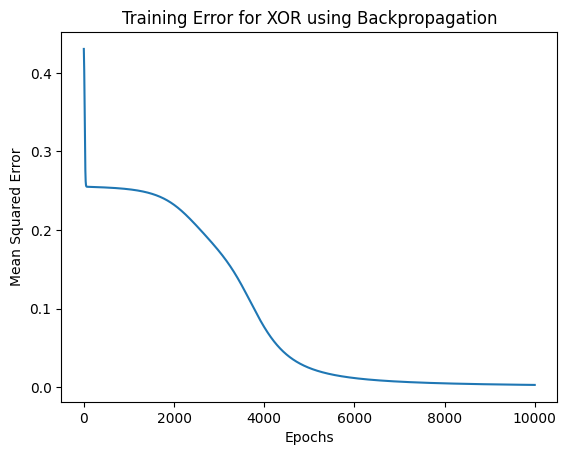

In [51]:
n = 2
func_type='XOR'
X, y = generate_data(n, func_type=func_type)
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, errors = backpropagation(X, y)

print(X, y)

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title(f'Training Error for {func_type} using Backpropagation')
plt.show()

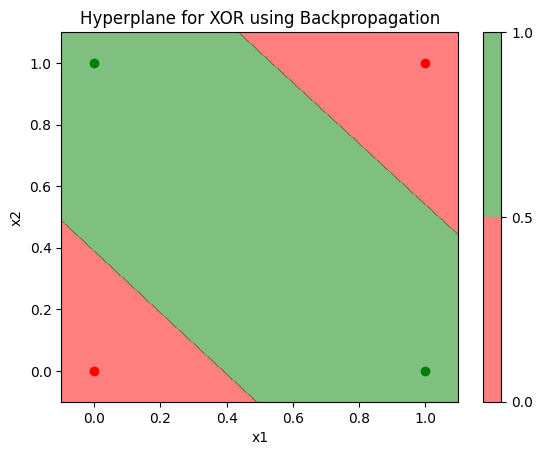

In [52]:
plot_hyperplane_backpropagation(X, y, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, func_type)